# Chapter 2: EDA (pag.37-40)

This is an example of solution of the exercise "EDA" that you can find at pag. 37 of "Doing data science" by Cathy O'Neill and Rachel Schutt.
The book shows how to solve it in R, but I have solved it in Pyhton. 

In [7]:
#We have to import some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

First of all, we have to load the 31 datasets named nyt1.csv, nyt2.csv, ... that you can find here: https://github.com/oreillymedia/doing_data_science or here: http://stat.columbia.edu/~rachel/datasets/.
Each one represents one (simulated) day's worth of ads shown and clicks recorded on the New York Times home page in May 2012. Each row represents a single user. There are five columns: Age, Gender (0=female, 1=male), Impressions, Clicks and Signed-In (not in all the files).

In [2]:
# I use BeautifulSoup to parse all the name of .csv file that are in the webpage
path='http://stat.columbia.edu/~rachel/datasets/'
r = requests.get(path)
content = r.content
soup = BeautifulSoup(content, "html.parser")
files_list=[]
for a in soup.find_all('a', href=True):
    if a['href'].lower().endswith(('.csv')): #I want to memorize just the name of .csv file
        files_list.append(a['href'])
    
print(files_list)

['nyt0.csv', 'nyt1.csv', 'nyt2.csv', 'nyt3.csv', 'nyt4.csv', 'nyt5.csv', 'nyt6.csv', 'nyt7.csv', 'nyt8.csv', 'nyt9.csv', 'nyt10.csv', 'nyt11.csv', 'nyt12.csv', 'nyt13.csv', 'nyt14.csv', 'nyt15.csv', 'nyt16.csv', 'nyt17.csv', 'nyt18.csv', 'nyt19.csv', 'nyt20.csv', 'nyt21.csv', 'nyt22.csv', 'nyt23.csv', 'nyt24.csv', 'nyt25.csv', 'nyt26.csv', 'nyt27.csv', 'nyt28.csv', 'nyt29.csv', 'nyt30.csv', 'nyt31.csv', 'userLevelData.csv']


In [3]:
day1=pd.read_csv(path+files_list[0])  #I memorize the data of day1 in a pandas dataframe
day1.head()

,Age,gender,n.impressions,n.clicks
0,48,1,5,0
1,64,0,3,0
2,56,1,6,0
3,33,0,5,0
4,31,0,7,0


### 1. Create a new variable, AgeGroup, that categorizes users as "<18", "18-24","25-34", "35-44", "45-54", "55-64", and "65+"

In [4]:
# I define a function so it will be easier to do the same thing for all the datasets
def create_age_bins(df):
    df['AgeGroup'] = pd.cut(x=df['Age'], bins=[0, 18, 24, 34, 44, 54, 64, float("inf")])
    
create_age_bins(day1)
day1.head()

,Age,gender,n.impressions,n.clicks,AgeGroup
0,48,1,5,0,"(44.0, 54.0]"
1,64,0,3,0,"(54.0, 64.0]"
2,56,1,6,0,"(54.0, 64.0]"
3,33,0,5,0,"(24.0, 34.0]"
4,31,0,7,0,"(24.0, 34.0]"


### 2 For a single day: <br>
###   2.1 plot the distributions of number impressions and click-through-rate  (CTR= #clicks / #impressions) for these six age categories

In [5]:
age_groups=day1['AgeGroup'].dropna().unique()
print(age_groups)

[(44.0, 54.0], (54.0, 64.0], (24.0, 34.0], (0.0, 18.0], (18.0, 24.0], (34.0, 44.0], (64.0, inf]]
Categories (7, interval[float64]): [(0.0, 18.0] < (18.0, 24.0] < (24.0, 34.0] < (34.0, 44.0] < (44.0, 54.0] < (54.0, 64.0] < (64.0, inf]]


(44.0, 54.0]


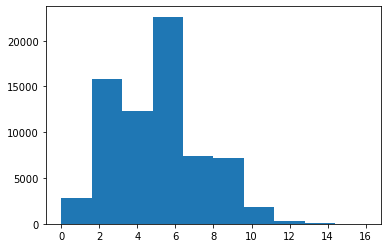

(54.0, 64.0]


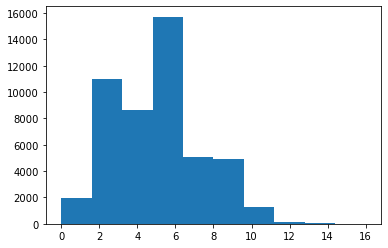

(24.0, 34.0]


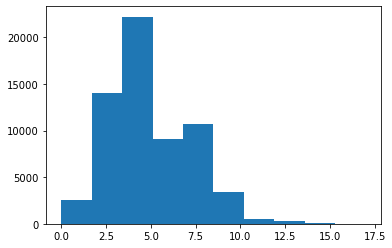

(0.0, 18.0]


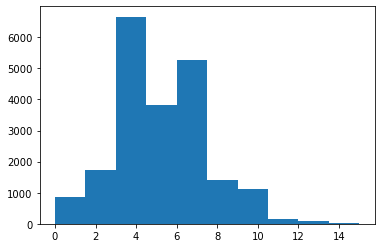

(18.0, 24.0]


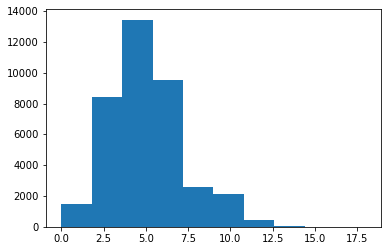

(34.0, 44.0]


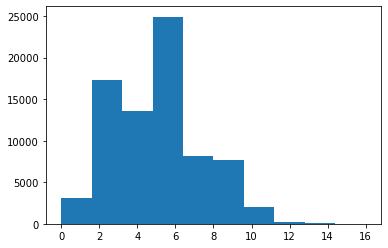

(64.0, inf]


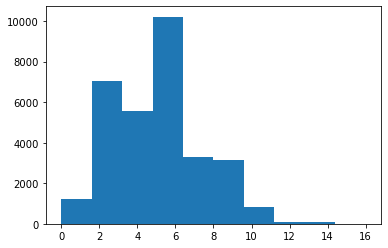

In [9]:
# Histograms that show the distribution of number of impression for each age group
for g in age_groups:
    print(g)
    values_for_age=day1[day1['AgeGroup']==g]
    plt.hist(values_for_age['n.impressions'].values)
    plt.show()

We don't care about clicks if there are no impressiones if there are clicks with no imps my assumptions about this data are wrong

(44.0, 54.0]


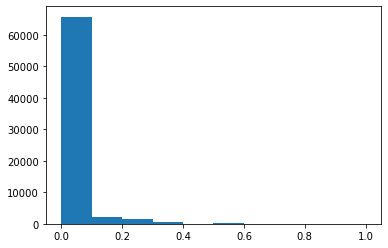

(54.0, 64.0]


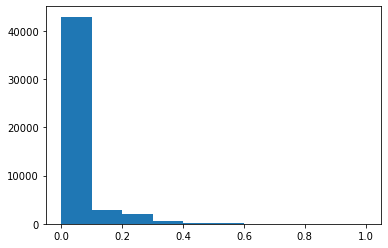

(24.0, 34.0]


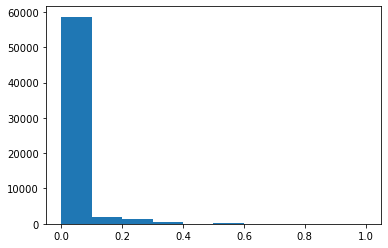

(0.0, 18.0]


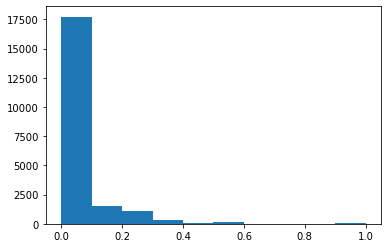

(18.0, 24.0]


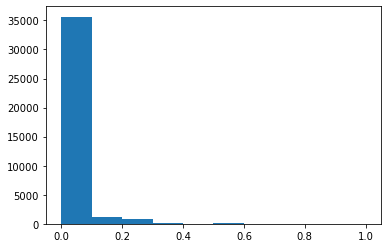

(34.0, 44.0]


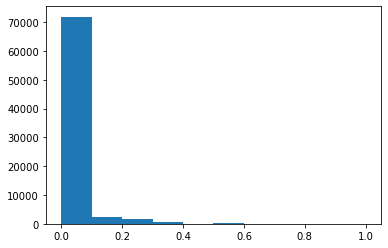

(64.0, inf]


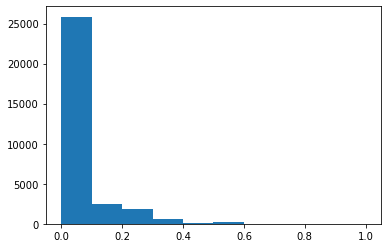

In [17]:
for g in age_groups:
    print(g)
    my_values=day1[(day1['AgeGroup']==g )&(day1['n.impressions']>0)]
    plt.hist(my_values['n.clicks'].values / my_values['n.impressions'].values)
    plt.show()

### 2.2 define a new variable to segment or categorize users based on their click behavior

I create a category for people that didn't get impressions, one for people that got impressions but didn't click and one for people that clicked on at least one ad

In [31]:
def cat_click_behavior(row): #function that categorize the single user
    if row['n.impressions']==0:
        return 'no_impressions'
    elif row['n.clicks']==0:
        return 'no_clicks'
    return 'some_clicks'

# I create the variable applying the function to all the rows
day1['ClickBehavior'] = day1.apply (lambda row: cat_click_behavior(row), axis=1) 
day1.head()

,Age,gender,n.impressions,n.clicks,AgeGroup,ClickBehavior
0,48,1,5,0,"(44.0, 54.0]",no_clicks
1,64,0,3,0,"(54.0, 64.0]",no_clicks
2,56,1,6,0,"(54.0, 64.0]",no_clicks
3,33,0,5,0,"(24.0, 34.0]",no_clicks
4,31,0,7,0,"(24.0, 34.0]",no_clicks


### 2.3 Explore the data and make visual and quantitative comparisons across user segments/demographics (<18-years-old males versus <18-years-old females or logged-in versus not, for example)

Let's visually compare the CTR of male vs females for each age group

(44.0, 54.0]


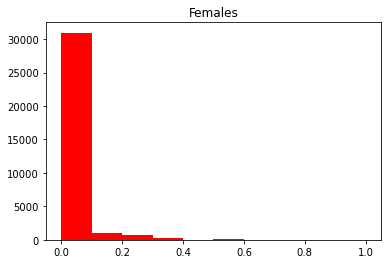

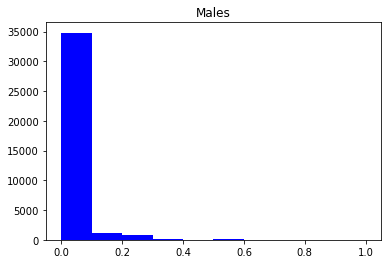

(54.0, 64.0]


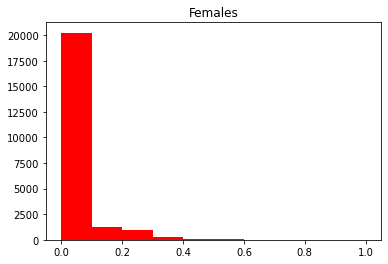

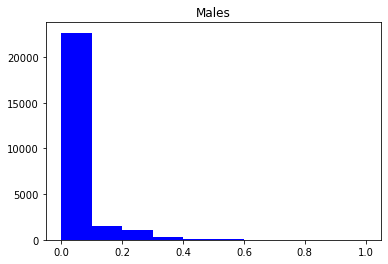

(24.0, 34.0]


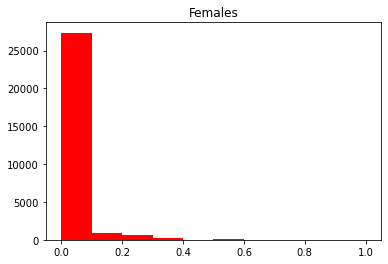

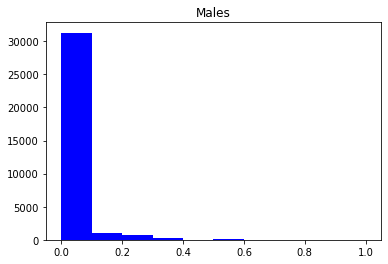

(0.0, 18.0]


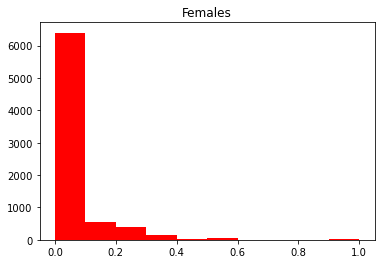

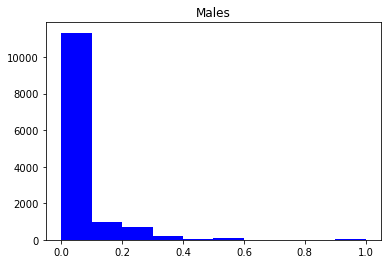

(18.0, 24.0]


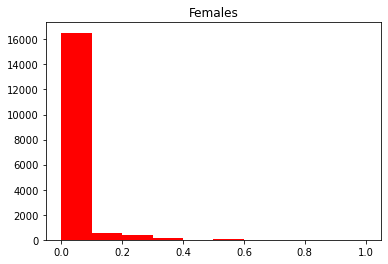

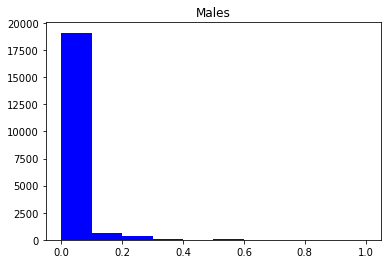

(34.0, 44.0]


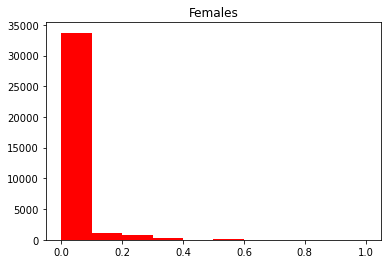

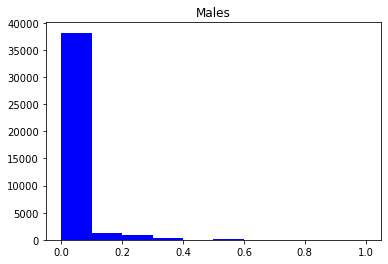

(64.0, inf]


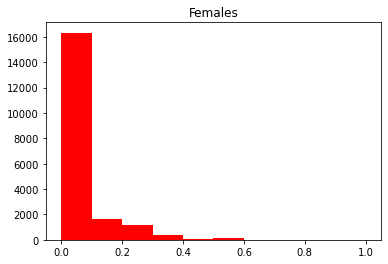

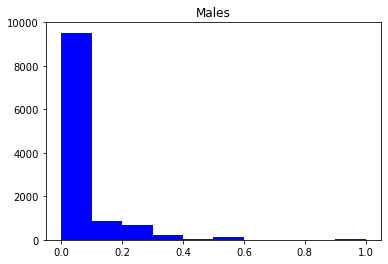

In [33]:
for g in age_groups:
    print(g)
    females=day1[(day1['AgeGroup']==g )&(day1['n.impressions']>0)&(day1['gender']==0)]
    males=day1[(day1['AgeGroup']==g )&(day1['n.impressions']>0)&(day1['gender']==1)]
    plt.hist(females['n.clicks'].values / females['n.impressions'].values, color='red')
    plt.title('Females')
    plt.show()
    plt.hist(males['n.clicks'].values / males['n.impressions'].values, color='blue')
    plt.title('Males')
    plt.show()

Let's visually compare the  number of impressions of male vs females for each age group

(44.0, 54.0]


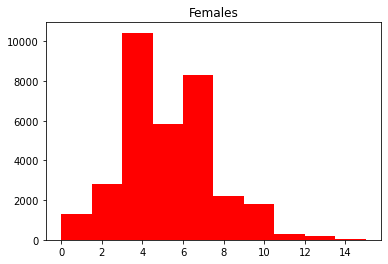

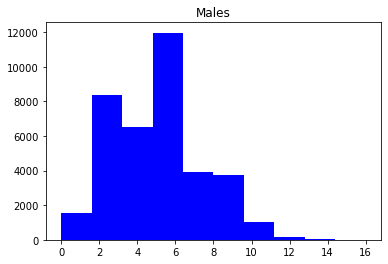

(54.0, 64.0]


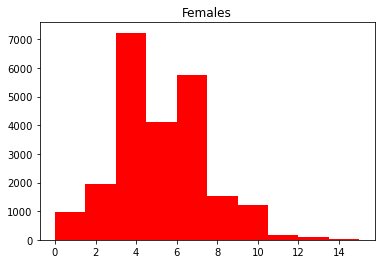

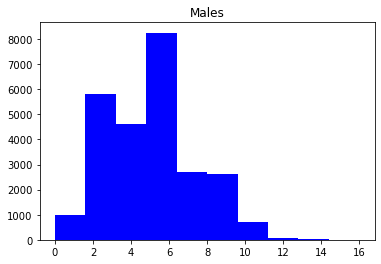

(24.0, 34.0]


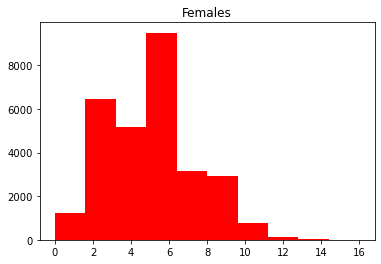

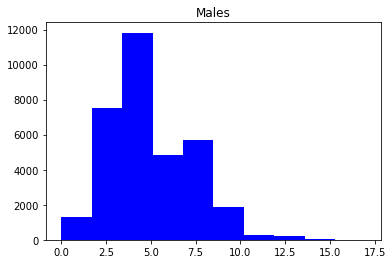

(0.0, 18.0]


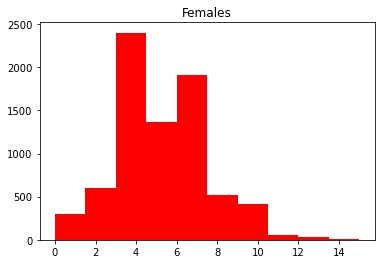

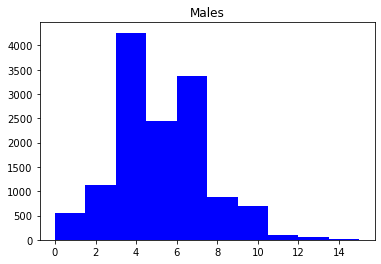

(18.0, 24.0]


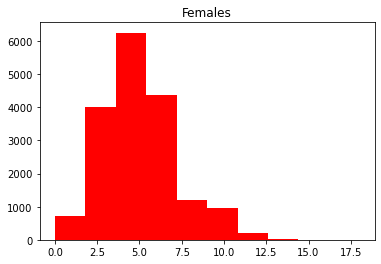

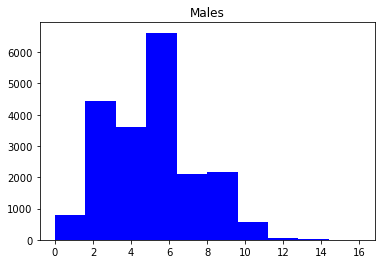

(34.0, 44.0]


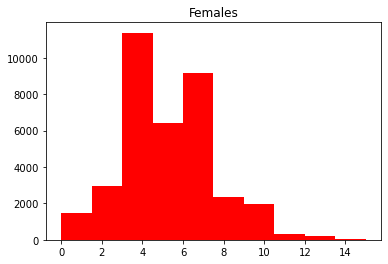

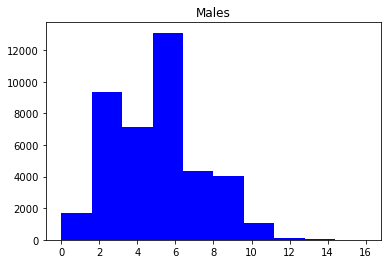

(64.0, inf]


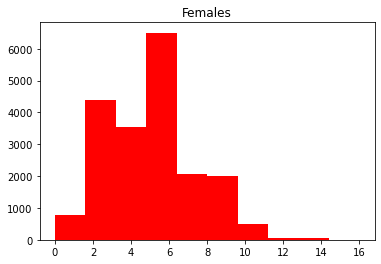

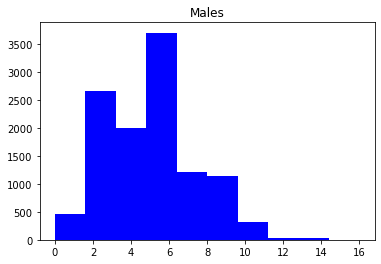

In [47]:
for g in age_groups:
    print(g)
    females=day1[(day1['AgeGroup']==g )&(day1['gender']==0)]
    males=day1[(day1['AgeGroup']==g )&(day1['gender']==1)]
    plt.hist(females['n.impressions'].values , color='red')
    plt.title('Females')
    plt.show()
    plt.hist(males['n.impressions'].values, color='blue')
    plt.title('Males')
    plt.show()

### 2.4 Create metrics / measurements / statistics that summarize the data. Examples of potential metrics include CTR, quantiles, mean, median, variance and max and these can be calculated across the various users segments. Be selective. Think about what will be important to track over time - what will compress the data, but still capture user beahavior.

In [55]:
def print_metrics(df):
    for g in age_groups:
        mean_f=df[(df['AgeGroup']==g )&(day1['gender']==0)]['n.impressions'].mean()
        mean_m=df[(df['AgeGroup']==g )&(day1['gender']==1)]['n.impressions'].mean()
        
        females=df[(df['AgeGroup']==g )&(day1['n.impressions']>0)&(day1['gender']==0)]
        males=df[(df['AgeGroup']==g )&(day1['n.impressions']>0)&(day1['gender']==1)]
        ctr_f=(females['n.clicks']/females['n.impressions']).mean()
        ctr_m=(males['n.clicks']/males['n.impressions']).mean()
        print('In the age group (' , g.left ,',', g.right ,'] we can observe that: \n')
        print('\t Every female user visualizes an average of' , mean_f, 'impression per day and has an average CTR of',
              ctr_f , '\n')
        print('\t Every male user visualizes an average of' , mean_m, 'impression per day and has an average CTR of',
              ctr_m , '\n')
        
print_metrics(day1)

In the age group ( 44.0 , 54.0 ] we can observe that: 

	 Every female user visualizes an average of 5.009247545032833 impression per day and has an average CTR of 0.013203684072405233 

	 Every male user visualizes an average of 4.99369584462269 impression per day and has an average CTR of 0.01270107944019226 

In the age group ( 54.0 , 64.0 ] we can observe that: 

	 Every female user visualizes an average of 4.985789177245353 impression per day and has an average CTR of 0.025879951431606426 

	 Every male user visualizes an average of 5.00545349062077 impression per day and has an average CTR of 0.025637468939719386 

In the age group ( 24.0 , 34.0 ] we can observe that: 

	 Every female user visualizes an average of 5.002928058288788 impression per day and has an average CTR of 0.01313118678724818 

	 Every male user visualizes an average of 5.013319824786198 impression per day and has an average CTR of 0.013387106082699596 

In the age group ( 0.0 , 18.0 ] we can observe that: 

	

### 3 Now extend your analysis across days. Visualize some metrics and distributions over time.

### 4 Describe and interpret any patterns you find